## 例2-7. ニュース記事に含まれる単語数の分布の可視化

In [40]:
import pandas as pd
import numpy as np

# Online News Popularity データセットを UCI リポジトリからダウンロードし、
# Pandas を使ってデータフレームとして読み込む。
df = pd.read_csv('data/news/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# ニュース記事に含まれる単語数 'n_tokens_content' に対数変換を施す
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


Text(0, 0.5, 'Number of Articles')

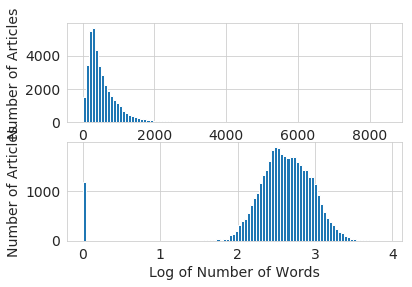

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(2,1)
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

## 例2-8. 平均評価を予測するためにYelpレビュー件数の対数変換を使う

In [38]:
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

with open('data/yelp/yelp_academic_dataset_business.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
    
# 例2-2で読み込んだ Yelp データセットの
# データフレーム biz_df を使用して、レビュー件数を対数変換する。
# レビュー件数 0 を対数変換してマイナス無限大になるのを防ぐために
# 対数変換の前に生データに 1 を加算していることに注意。
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)
biz_df.head()

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,log_review_count
0,rncjoVoEFUJGCUoC1JgnUA,"[Accountants, Professional Services, Tax Servi...",Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,5.0,AZ,business,0.602060
1,0FNFSzCFP_rGUoJx8W7tJg,"[Sporting Goods, Bikes, Shopping]",Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",33.604054,-112.105933,Bike Doctor,[],True,5,5.0,AZ,business,0.778151
2,3f_lyB6vFK48ukH6ScvLHg,[],Phoenix,"1134 N Central Ave\nPhoenix, AZ 85004",33.460526,-112.073933,Valley Permaculture Alliance,[],True,4,5.0,AZ,business,0.698970
3,usAsSV36QmUej8--yvN-dg,"[Food, Grocery]",Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",33.392210,-112.085377,Food City,[],True,5,3.5,AZ,business,0.778151
4,PzOqRohWw7F7YEPBz6AubA,"[Food, Bagels, Delis, Restaurants]",Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",33.712797,-112.200264,Hot Bagels & Deli,[],True,14,3.5,AZ,business,1.176091


In [39]:
# 各店舗の平均評価（stars）を予測するために線形回帰モデルを学習する。
# 特徴量 review_count を対数変換した場合としない場合とで
# 10分割クロスバリデーションにより R2 スコアを比較する。
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']],
                              biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']],
                             biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00215 (+/- 0.00329)
R-squared score with log transform: 0.00136 (+/- 0.00328)


## 例2-9. Online News Popularity データセットの記事の人気を予測するために単語数を対数変換する

In [42]:
# Online News Popularity データセットを UCI リポジトリからダウンロードし、
# Pandas を使ってデータフレームとして読み込む。
df = pd.read_csv('data/news/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# ニュース記事内に含まれる単語数 'n_tokens_content' に対数変換を施す
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

# 記事のシェア数を予測する2つの線形回帰モデルを学習する。
# 1つは元の特徴量であり、もう1つは対数変換をかけた特徴量を使う。
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']],
                              df['shares'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']],
                             df['shares'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)"
      % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)"
      % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


## 例2-10. ニュース記事の人気予測問題における入出力間の相関の可視化

Text(0, 0.5, 'Number of Shares')

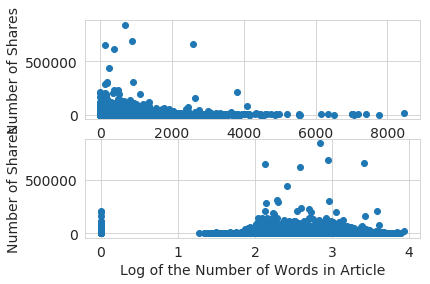

In [43]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

## 例2-11. Yelp評価予測における入力と出力の相関の可視化

Text(0, 0.5, 'Average Star Rating')

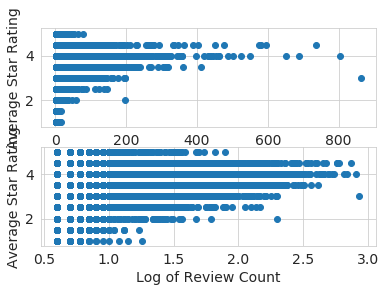

In [44]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

## 例2-12. Yelpレビュー件数の Box-Cox 変換

In [48]:
from scipy import stats

# 引き続き biz_df には Yelp のレビューデータが含まれるとする。
# Box-Cox 変換は入力がすべて正であることを仮定するため、
# まずは最小値を調べてマイナスの値を取らないか確認する。
# Check the min to make sure.
biz_df['review_count'].min()

3

In [49]:
# 引数 lambda に 0 を与えると対数変換になる（定数を足さない）
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
# 引数 lambda に何も与えなければ、scipy 実装では変換後のデータが
# 正規分布に最も近づくようにパラメータ lambda が自動的に決定される
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.5631160899391674

## 例2-13. レビュー件数の元データ、対数変換後、Box-Cox変換後のヒストグラムを作成

Text(0, 0.5, 'Occurrence')

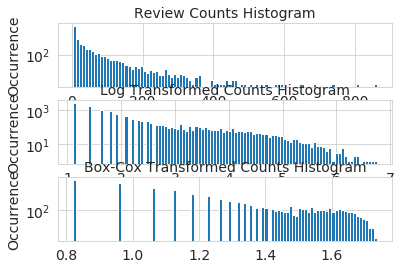

In [60]:
biz_df['rc_log'] = rc_log
biz_df['rc_bc'] = rc_bc

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# レビュー件数のヒストグラム
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 対数変換後のレビュー件数のヒストグラム
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# 最適な Box-Cox 変換後のレビュー件数のヒストグラム
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## 例2-14. 元データと変換後データの正規分布に対する確率プロット

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

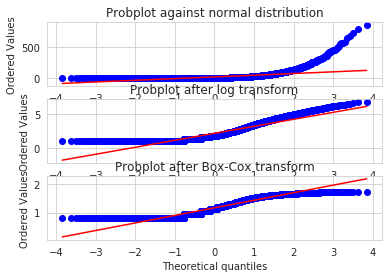

In [61]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

## 例2-15. 特徴量スケーリングの例

In [1]:
import pandas as pd
import sklearn.preprocessing as preproc

# Online News Popularity データセットの読み込み
df = pd.read_csv('data/news/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# 元データ（記事中の単語数）
df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

In [2]:
# Min-Max スケーリング
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [3]:
# 標準化（定義より出力が負になることもある）
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [4]:
# L2 正規化
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

## 例2-16. 元データとスケーリング後のヒストグラムの描画

Text(27.125, 0.5, 'Number of articles')

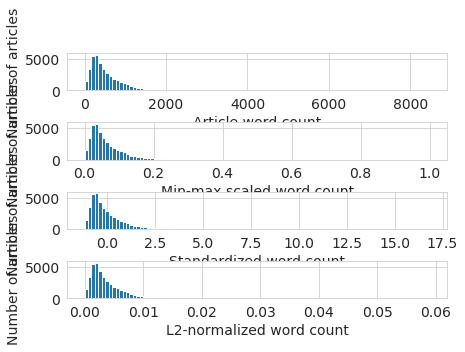

In [66]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

## 例2-17. 交互作用特徴量を使った予測の例

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

df = pd.read_csv('data/news/OnlineNewsPopularity.csv', delimiter=', ', engine='python')
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [6]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
            'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
            'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
            'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment',
            'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']

X = df[features]
y = df[['shares']]

# ペアワイズ交互作用特徴量を作成する（定数項（bias）は含めない）
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [9]:
# 両方の特徴量セットを訓練データとテストデータに分ける
X1_train, X1_test, X2_train, X2_test, y_train, y_test = \
    train_test_split(X, X2, y, test_size=0.3, random_state=123)

def evaluate_feature(X_train, X_test, y_train, y_test):
    """
    訓練データに対して線形回帰モデルを適合し
    テストデータに対してスコアを算出する
    """
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

# それぞれの特徴量に対してモデルを学習し、テストスコアを算出する
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0112593685
